<a href="https://colab.research.google.com/github/Viliuskerutis/AML/blob/main/AML_MP1_Kerutis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MP1 - Viral Data Analysis
Date: 2020.10.11

Author: © 2020 Vilius Kerutis

This notebook is part of an individual project for [KTU IF](https://fi.ktu.edu/) [P176M010 Advanced Machine Learning](https://admissions.ktu.edu/programme/m-software-engineering/#P176M010) class led by [M. Lukoševičius](http://mantas.info/).

Here I analyze open COVID-19 data from https://ourworldindata.org/ to answer the following questions:

1. [Which country has the most deaths per million people in June?](#Q1)
1. [What is the correlation between human development and total deaths among countries?](#Q2)
1. [What is the future prognosis of total deaths per million people, taking a history of total cases as input in Haiti?](#Q3)

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International license</a>. <a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons licencija" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a>

## Load the data

In [210]:
import pandas as pd
import numpy as np
from datetime import date, timedelta
import numpy.ma as ma
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
pd.options.mode.chained_assignment = None

<a id='Q1'></a>
# 1. Which country has the most deaths per million people in June?

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Viliuskerutis/AML/main/owid-covid-data.csv', low_memory=False)
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

Check the "freshness" of the data.

In [3]:
df.date.max()

'2020-10-23'

All the different country codes:

In [4]:
df.iso_code.unique()

array(['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM',
       'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BES', 'BFA',
       'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL',
       'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL',
       'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI',
       'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK',
       'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESH', 'ESP', 'EST', 'ETH',
       'FIN', 'FJI', 'FLK', 'FRA', 'FRO', 'GAB', 'GBR', 'GEO', 'GGY',
       'GHA', 'GIB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL',
       'GTM', 'GUM', 'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN',
       'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM',
       'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KNA', 'KOR',
       'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO',
       'LTU', 'LUX', 'LVA', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX',
       'MKD', 'MLI',

Column info.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52010 entries, 0 to 52009
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         51712 non-null  object 
 1   continent                        51414 non-null  object 
 2   location                         52010 non-null  object 
 3   date                             52010 non-null  object 
 4   total_cases                      48403 non-null  float64
 5   new_cases                        51127 non-null  float64
 6   new_cases_smoothed               50339 non-null  float64
 7   total_deaths                     39558 non-null  float64
 8   new_deaths                       51127 non-null  float64
 9   new_deaths_smoothed              50339 non-null  float64
 10  total_cases_per_million          48141 non-null  float64
 11  new_cases_per_million            51063 non-null  float64
 12  new_cases_smoothed

In [6]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,4.840300e+04,51127.000000,50339.000000,3.955800e+04,51127.000000,50339.000000,48141.000000,51063.000000,50274.000000,39311.000000,51063.000000,50274.000000,1.974700e+04,1.940500e+04,19747.000000,19405.000000,2.179200e+04,21792.000000,20099.000000,20443.000000,43401.000000,5.171200e+04,49319.000000,46327.000000,45633.000000,46086.000000,45715.000000,30486.000000,46307.000000,47979.000000,36133.000000,35670.000000,21826.000000,41762.000000,51052.000000,44695.000000
mean,1.363255e+05,1633.995130,1610.990888,6.138200e+03,44.546169,44.541465,2509.232423,30.042849,29.171387,85.372714,0.591967,0.588009,1.905907e+06,2.581705e+04,66.336827,0.826141,2.488937e+04,0.805787,192.383357,0.064548,56.947631,8.695300e+07,361.309540,31.252106,9.215518,5.825576,20759.873465,12.286751,252.008369,8.055200,10.772976,32.639174,52.273566,3.098288,73.977683,0.723461
std,1.365615e+06,14742.358503,14422.555759,4.970171e+04,371.661458,360.945190,4961.512720,106.407273,72.906009,169.636207,2.937695,1.865053,8.657876e+06,1.051654e+05,132.322326,1.534724,9.695588e+04,1.387750,915.093742,0.087988,26.684086,6.070910e+08,1648.604689,9.036782,6.307452,4.304546,20372.636885,19.332899,117.420490,4.155891,10.475901,13.440016,31.625685,2.520225,7.387655,0.153074
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,-67.901000,-9.678000,1.000000e+00,-3.743000e+03,0.000000,-0.398000,0.000000e+00,0.000000,1.535000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.440000e+02,0.000000,0.714000,1.100000e+01,0.000000,0.000000,72.480000,0.000000,0.202000,3.378500,0.000000,0.000000,5.366700e+04,1.008000e+03,3.338000,0.068000,1.091000e+03,0.069000,11.479500,0.009000,38.890000,1.399491e+06,37.728000,23.300000,3.552000,2.085000,5338.454000,0.500000,155.898000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,1.724000e+03,12.000000,17.286000,7.200000e+01,0.000000,0.286000,479.937000,1.863000,3.431000,17.557000,0.000000,0.025000,2.299580e+05,3.486000e+03,17.078000,0.311000,3.874500e+03,0.325000,32.519000,0.030000,61.110000,8.278737e+06,88.125000,31.100000,6.981000,4.393000,14048.881000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.400000,0.754000
75%,1.705000e+04,194.000000,202.500000,6.140000e+02,3.000000,3.429000,2794.176000,21.600500,24.295000,71.529000,0.243000,0.345000,9.141365e+05,1.281300e+04,72.630000,0.970000,1.371450e+04,0.975000,105.000000,0.086000,78.700000,2.982597e+07,214.243000,39.700000,14.762000,9.395000,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,4.177193e+07,437012.000000,390097.429000,1.138780e+06,10491.000000,7456.857000,49323.756000,8652.658000,2472.188000,1237.551000,215.382000,63.140000,1.600000e+08,1.492409e+06,1553.505000,25.971000,1.169107e+06,19.098000,45864.000000,0.651000,100.000000,7.794799e+09,19347.500000,48.200000,27.049000,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


Find a country with the most total deaths per million people in June.

In [7]:
date_from = pd.Timestamp(date(2020,6,1))
date_to = pd.Timestamp(date(2020,7,1))
df['date'] =  pd.to_datetime(df['date'])
dff = df[(df['date'] > date_from ) & (df['date'] < date_to)]
dff = dff.loc[dff['total_deaths_per_million'].idxmax()]

pd.DataFrame(dff[['iso_code', 'continent', 'location','total_cases','total_deaths','total_cases_per_million','total_deaths_per_million','population']])

,42289
iso_code,SMR
continent,Europe
location,San Marino
total_cases,687
total_deaths,42
total_cases_per_million,20242.8
total_deaths_per_million,1237.55
population,33938


<a id='Q2'></a>
# 2. What is the correlation between human development and total deaths among countries?

In [9]:
yesterday = date.today() - timedelta(2)
dfff = df[(df['date'] == date.strftime(yesterday, '%Y-%m-%d 00:00:00'))]

Text(0.5, 1.0, 'Correlation HDI and Total deaths')

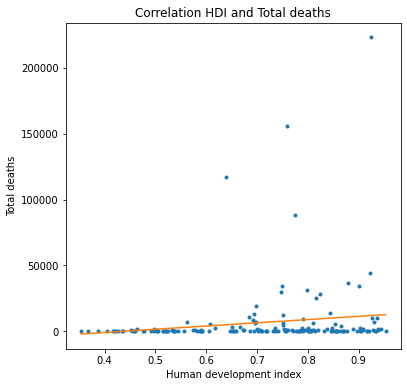

In [10]:
plt.figure(figsize=(6,6))
x = dfff.human_development_index
y = dfff.total_deaths
plt.plot(x, y, '.')
plt.xlabel('Human development index')
plt.ylabel('Total deaths')

w1, w0 = ma.polyfit(ma.masked_invalid(x), ma.masked_invalid(y), 1)
x_all = np.linspace(x.min(), x.max(), 100)
plt.plot(x_all, w0 + w1 * x_all, '-')

plt.title('Correlation HDI and Total deaths')

In [11]:
ma.corrcoef(ma.masked_invalid(x), ma.masked_invalid(y))[0,1]

0.15609727079402214

Text(0.5, 1.0, 'Correlation HDI and Total deaths per million people')

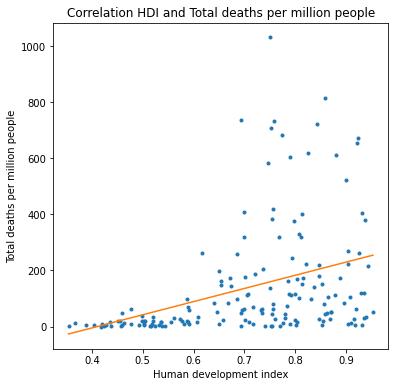

In [12]:
plt.figure(figsize=(6,6))
x = dfff.human_development_index
y = dfff.total_deaths_per_million
plt.plot(x, y, '.')
plt.xlabel('Human development index')
plt.ylabel('Total deaths per million people')

w1, w0 = ma.polyfit(ma.masked_invalid(x), ma.masked_invalid(y), 1)
x_all = np.linspace(x.min(), x.max(), 100)
plt.plot(x_all, w0 + w1 * x_all, '-')

plt.title('Correlation HDI and Total deaths per million people')

In [13]:
ma.corrcoef(ma.masked_invalid(x), ma.masked_invalid(y))[0,1]

0.36798225921535566

Correlation:

In [14]:
result1 = dfff['total_deaths'].corr(dfff['human_development_index'])
result2 = dfff['total_deaths_per_million'].corr(dfff['human_development_index'])
pd.DataFrame({"Correlation using:": ["Total deaths only:", "Total deaths per million people:"], "Result": [result1, result2]})

,Correlation using:,Result
0,Total deaths only:,0.156097
1,Total deaths per million people:,0.367982


There is a promiment correlation (coef. 0.16) between the HDI per capita and the total number of deaths per capita among countries.
There is a promiment correlation (coef. 0.37) between the HDI per capita and the total number of deaths per million people per capita among countries.

The same in loglog space:

Text(0.5, 1.0, 'Correlation HDI and Total deaths')

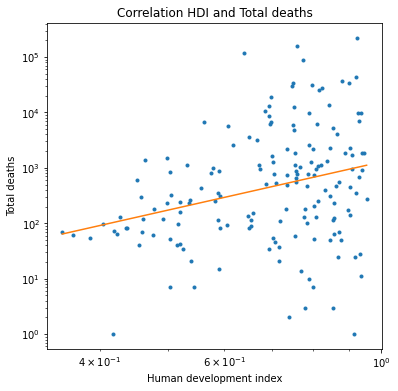

In [16]:
plt.figure(figsize=(6,6))
x = dfff.human_development_index
y = dfff.total_deaths
plt.loglog(x, y, '.')
plt.xlabel('Human development index')
plt.ylabel('Total deaths')


w1, w0 = ma.polyfit(ma.log(ma.masked_invalid(x)), ma.log(ma.masked_invalid(y)), 1)
x_all = np.linspace(np.log(x.min()), np.log(x.max()), 100)
plt.plot(np.exp(x_all), np.exp(w0 + w1 * x_all), '-')
plt.title('Correlation HDI and Total deaths')

In [17]:
ma.corrcoef(ma.log(ma.masked_invalid(x)), ma.log(ma.masked_invalid(y)))[0,1]

0.28965229435325474

Text(0.5, 1.0, 'Correlation HDI and Total deaths per million people')

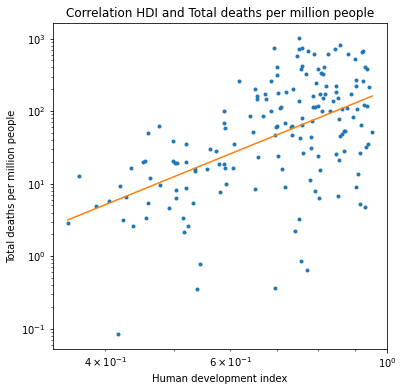

In [18]:
plt.figure(figsize=(6,6))
x = dfff.human_development_index
y = dfff.total_deaths_per_million
plt.loglog(x, y, '.')
plt.xlabel('Human development index')
plt.ylabel('Total deaths per million people')


w1, w0 = ma.polyfit(ma.log(ma.masked_invalid(x)), ma.log(ma.masked_invalid(y)), 1)
x_all = np.linspace(np.log(x.min()), np.log(x.max()), 100)
plt.plot(np.exp(x_all), np.exp(w0 + w1 * x_all), '-')
plt.title('Correlation HDI and Total deaths per million people')

In [ ]:
ma.corrcoef(ma.log(ma.masked_invalid(x)), ma.log(ma.masked_invalid(y)))[0,1]

0.5353294475125274

On logarithmic scales the correlation is even more evident:

Correlation between HDI and Total deaths: coef. 0.29

Correlation between HDI and Total deaths per million people: coef. 0.54

A possible explanation could be that even though the countries with higher HDI per capita tend to have a better quality of life, higher literacy rate, and lifetime, their residents also have a more active social life (traveling, physical communication, being in a public most of the time).

<a id='Q3'></a>
# 3. What is the future prognosis of total deaths per million people, taking a history of total cases as input in Haiti?

In [115]:
dfff = df[(df['location'] == 'Haiti' )]
dfff = dfff[dfff.total_deaths_per_million > 0]
dfff = dfff[dfff.total_cases > 0]
dfff = dfff.dropna(axis=1, how='all')
dfff.drop('iso_code', axis='columns', inplace=True)
dfff.drop('continent', axis='columns', inplace=True)
dfff.drop('location', axis='columns', inplace=True)
dfr = dfff[['total_deaths_per_million']] 

pd.DataFrame(dfff)

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
21236,2020-04-07,24.0,3.0,1.286,1.0,1.0,0.143,2.105,0.263,0.113,0.088,0.088,0.013,90.74,11402533.0,398.448,24.3,4.8,2.954,1653.173,23.5,430.548,6.65,2.9,23.1,22.863,0.7,64.0,0.498
21237,2020-04-08,25.0,1.0,1.429,1.0,0.0,0.143,2.192,0.088,0.125,0.088,0.000,0.013,90.74,11402533.0,398.448,24.3,4.8,2.954,1653.173,23.5,430.548,6.65,2.9,23.1,22.863,0.7,64.0,0.498
21238,2020-04-09,27.0,2.0,1.571,1.0,0.0,0.143,2.368,0.175,0.138,0.088,0.000,0.013,90.74,11402533.0,398.448,24.3,4.8,2.954,1653.173,23.5,430.548,6.65,2.9,23.1,22.863,0.7,64.0,0.498
21239,2020-04-10,30.0,3.0,1.714,2.0,1.0,0.286,2.631,0.263,0.150,0.175,0.088,0.025,90.74,11402533.0,398.448,24.3,4.8,2.954,1653.173,23.5,430.548,6.65,2.9,23.1,22.863,0.7,64.0,0.498
21240,2020-04-11,31.0,1.0,1.857,2.0,0.0,0.286,2.719,0.088,0.163,0.175,0.000,0.025,90.74,11402533.0,398.448,24.3,4.8,2.954,1653.173,23.5,430.548,6.65,2.9,23.1,22.863,0.7,64.0,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21431,2020-10-19,8925.0,0.0,6.143,231.0,0.0,0.143,782.721,0.000,0.539,20.259,0.000,0.013,43.52,11402533.0,398.448,24.3,4.8,2.954,1653.173,23.5,430.548,6.65,2.9,23.1,22.863,0.7,64.0,0.498
21432,2020-10-20,8976.0,51.0,13.429,231.0,0.0,0.143,787.194,4.473,1.178,20.259,0.000,0.013,43.52,11402533.0,398.448,24.3,4.8,2.954,1653.173,23.5,430.548,6.65,2.9,23.1,22.863,0.7,64.0,0.498
21433,2020-10-21,8976.0,0.0,12.714,231.0,0.0,0.143,787.194,0.000,1.115,20.259,0.000,0.013,43.52,11402533.0,398.448,24.3,4.8,2.954,1653.173,23.5,430.548,6.65,2.9,23.1,22.863,0.7,64.0,0.498
21434,2020-10-22,8979.0,3.0,10.143,231.0,0.0,0.000,787.457,0.263,0.890,20.259,0.000,0.000,NaN,11402533.0,398.448,24.3,4.8,2.954,1653.173,23.5,430.548,6.65,2.9,23.1,22.863,0.7,64.0,0.498


In [134]:
pd.DataFrame(dfr)

,total_deaths_per_million
21236,0.088
21237,0.088
21238,0.088
21239,0.175
21240,0.175
...,...
21431,20.259
21432,20.259
21433,20.259
21434,20.259


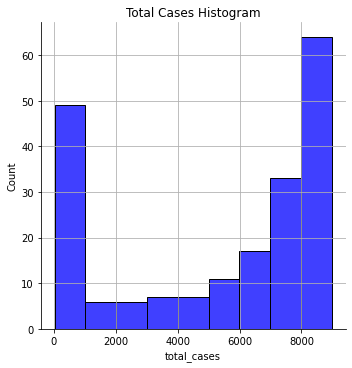

In [89]:
sns.displot(dfff['total_cases'], color="blue")
plt.title('Total Cases Histogram')
plt.grid(True)
plt.show()

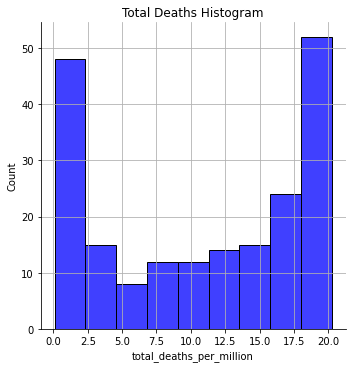

In [90]:
sns.displot(dfff['total_deaths_per_million'], color="blue")
plt.title('Total Deaths Histogram')
plt.grid(True)
plt.show()

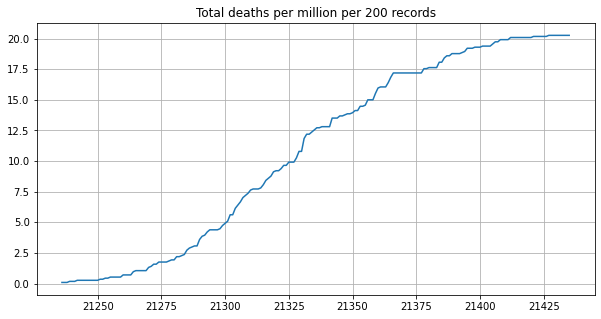

In [116]:
dfff['total_deaths_per_million'].plot(figsize = (10,5), grid = True)
plt.title('Total deaths per million per 200 records')
plt.show()

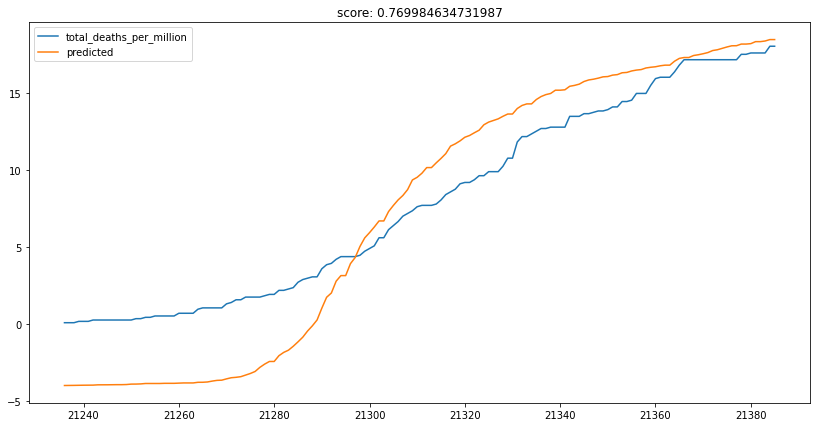

In [211]:
def experiment(X_train_, y_train_, X_test_, y_test_):
    pipe0 = Pipeline([('scaler', StandardScaler()), ('svc', LinearRegression())])
    pipe0 = pipe0.fit(X_train_, y_train_)
    score = pipe0.score(X_test_, y_test_)
    y_test_['predicted'] = pipe0.predict(X_test_.values)
    y_test_.plot(figsize=(14,7), title=f"score: {score}")
    pd.DataFrame(y_test_)
    return pipe0

x_train = dfff.iloc[150:, [1]]
y_train = dfr.iloc[150:]
x_test = dfff.iloc[:150, [1]]
y_test = dfr.iloc[:150]

pipe = experiment(x_train, y_train, x_test, y_test)

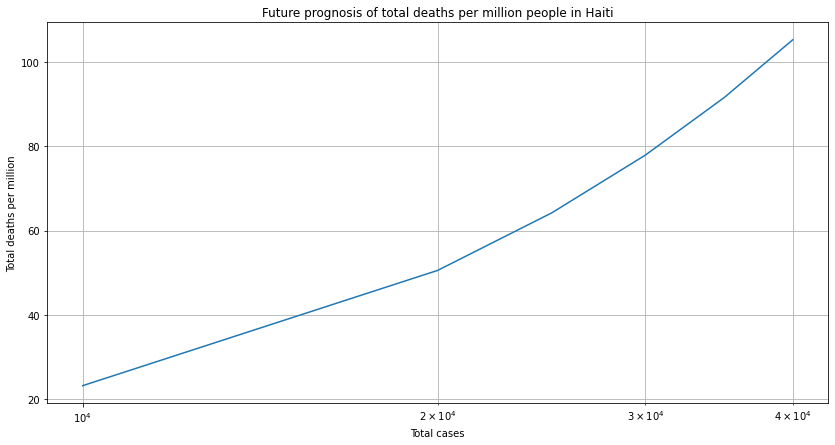

In [205]:
data = np.array([[10000],[20000],[25000],[30000],[35000],[40000]])
future_prognosis = pipe.predict(data)
future_prognosis
plt.figure(figsize=(14,7))
plt.grid(which='both')
plt.plot(data,future_prognosis)
plt.title('Future prognosis of total deaths per million people in Haiti')
plt.xlabel('Total cases')
plt.xscale('log')
plt.ylabel('Total deaths per million')
plt.show()